In [95]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, scipy, random

In [96]:
def weightset(N): return [3**i for i in range(N)]

In [97]:
weightset(5)

[1, 3, 9, 27, 81]

In [98]:
def answer(x):
    R, L = [], []
    tot = []
    for weight in x:
        if sum(R) <= sum(L):
            R.append(weight)
            tot.append("R")
        elif sum(L) < sum(R):
            L.append(weight)
            tot.append("L")
    return f"sum R = {sum(R)}, sum L {sum(L)}", tot

#answer(weightset(20))

In [99]:
def balance_weight_set(weight_set, target_weight):
    """
    Given a weight set and a target weight, return a tuple of two lists of weights that can be used to balance
    the target weight, or None if no solution exists.

    Args:
    - weight_set (list): A list of weights, where each weight is a power of 3 (1, 3, 9, 27, ...)
    - target_weight (int): The weight that needs to be balanced

    Returns:
    - A tuple of two lists of weights that can be used to balance the target weight, or None if no solution exists.
    """

    # If the target weight is zero, we can balance it with an empty set of weights
    if target_weight == 0:
        return ([], [])

    # If the weight set is empty or the target weight is negative, there is no solution
    if not weight_set or target_weight < 0:
        return None

    # Try adding the first weight in the set to one side and recursively balance the remaining weight
    left_side = [weight_set[0]]
    remaining_weight = target_weight - weight_set[0]
    solution = balance_weight_set(weight_set[1:], remaining_weight)
    if solution is not None:
        return (left_side + solution[0], solution[1])

    # Try adding the first weight to the other side instead
    right_side = [weight_set[0]]
    solution = balance_weight_set(weight_set[1:], target_weight)
    if solution is not None:
        return (solution[0], right_side + solution[1])

    # If neither approach worked, there is no solution
    return None

weight_set = [1, 3, 9, 27, 81]
target_weight = 19
solution = balance_weight_set(weight_set, target_weight)
if solution is not None:
    print(f"Solution: {solution[0]} = {solution[1]}")
else:
    print("No solution found")

No solution found


## Question 2.1

## Question 2.2
$$
{\displaystyle {\begin{aligned}\int _{a}^{b}f(x)\,dx&\approx {\frac {1}{3}}h\sum _{i=1}^{n/2}{\big [}f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i}){\big ]}\\&={\frac {1}{3}}h{\big [}f(x_{0})+4f(x_{1})+2f(x_{2})+4f(x_{3})+2f(x_{4})+\dots +2f(x_{n-2})+4f(x_{n-1})+f(x_{n}){\big ]}\\&={\frac {1}{3}}h\left[f(x_{0})+4\sum _{i=1}^{n/2}f(x_{2i-1})+2\sum _{i=1}^{n/2-1}f(x_{2i})+f(x_{n})\right].\end{aligned}}}
$$

In [100]:
def simpsons_rule_sum(a,b,f,N):
    h = (b - a)/N # divide N into subintervals of length h
    dx = [a + n*h for n in range(N+1)] # create a list of all of the subintervals from a to b 
    first_sum = sum([f(dx[i]) for i in range(1,N,2)]) # \sum_{i=1}^{N/2} f(x_{2i-1})
    second_sum = sum([f(dx[i]) for i in range(2,N,2)]) # \sum_{i=1}^{N/2-1} f(x_{2i})
    return 1/3 * h * (f(a) + 4*first_sum + 2*second_sum + f(b))
a, b, N = 0, 5, 1000
f = lambda x: x**2 + 3*x - 1
simpsons_rule_sum(a,b,f,N)

74.16666666666664

### Question 2.3
Calculate the integral of a Gaussian function $e^{-x^2/2}$ in the range of [0, upper_limit]. Vary the
upper_limit from 0 to 50 with an interval of 0.1. Plot the integral as a function of the upper_limit.
Set the number of equal subdivisions, N, to 100.

In [101]:
gaus = lambda x: np.exp(-x**2 / 2)
a, upper_limit_arr, N = 0, np.arange(0,50.1,0.1), 100
gaus_int = [simpsons_rule_sum(a,upper_limit,gaus,N) for upper_limit in upper_limit_arr]

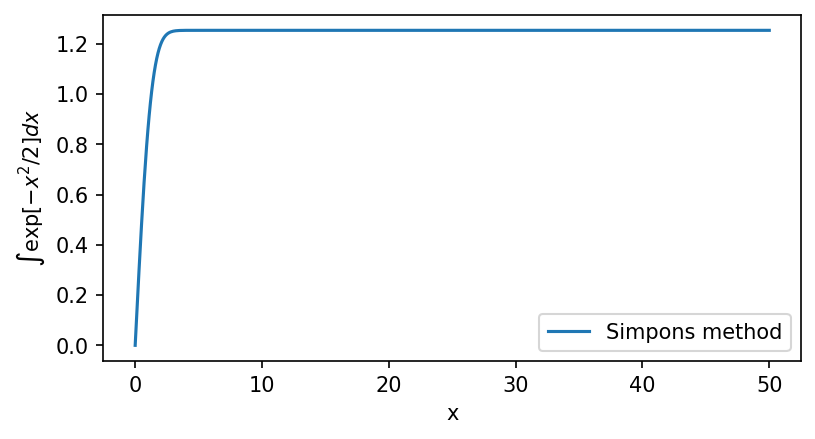

In [102]:
fig, ax = plt.subplots(1,1,figsize=(6,3),dpi=150)
ax.plot(upper_limit_arr, gaus_int, label="Simpons method")
ax.set_ylabel("$\int \exp[-x^2/2] dx$", rotation=90)
ax.set_xlabel("x")
ax.legend()
_=plt.show()

### Question 2.4
Repeat 2.3 using the trapezoid method (See Demo_0306/compare_quad.py) and the
scipy.integrate.quad function for the integration. The latter can serve as the ground truth.

In [103]:
def trap(a,b,f,N):
    h = (b - a)/N # divide N into subintervals of length h
    dx = [a + n*h for n in range(N+1)] # create a list of all of the subintervals from a to b 
    heights = [(f(dx[i]) + f(dx[i+1])) * (dx[i+1]-dx[i]) / 2 for i in range(N)] # takes the mean of the height from the left most and the right most sides from the trapezoid and multiplies it by the width of the trapezoid     return sum(heights)
    return sum(heights)

In [104]:
a, upper_limit_arr, N = 0, np.arange(0,50.1,0.1), 100
trap_int = [trap(a,upper_limit,gaus,N) for upper_limit in upper_limit_arr]

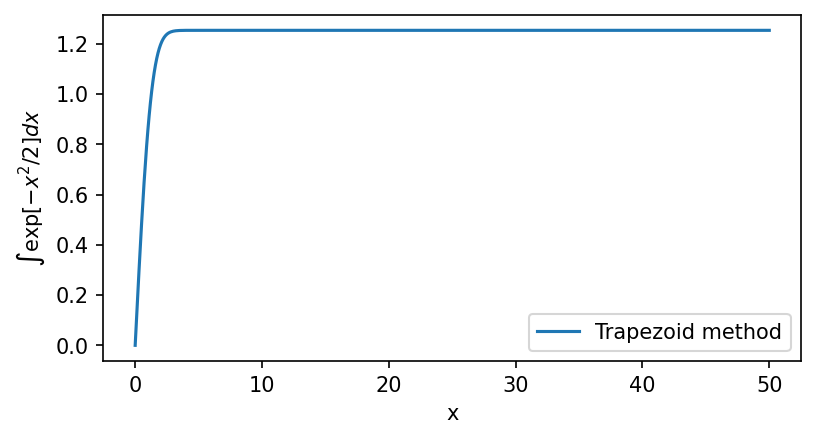

In [105]:
fig, ax = plt.subplots(1,1,figsize=(6,3),dpi=150)
ax.plot(upper_limit_arr, trap_int, label="Trapezoid method")
ax.set_ylabel("$\int \exp[-x^2/2] dx$")
ax.set_xlabel("x")
ax.legend()
_=plt.show()

In [112]:
a, upper_limit_arr, N = 0, np.arange(0,50.1,0.1), 100
scipy_int = np.array([scipy.integrate.quad(gaus, a, upper_limit) for upper_limit in upper_limit_arr]).T[0]

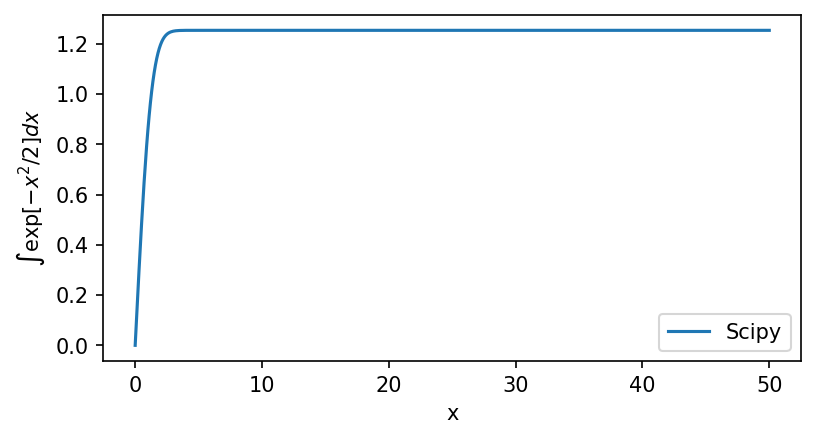

In [113]:
fig, ax = plt.subplots(1,1,figsize=(6,3),dpi=150)
ax.plot(upper_limit_arr, scipy_int, label="Scipy")
ax.set_ylabel("$\int \exp[-x^2/2] dx$")
ax.set_xlabel("x")
ax.legend()
_=plt.show()

### Question 2.5

### Question 2.6

### Question 3.1

### Question 3.2

### Question 3.3

### Question 3.4

### Question 3.5

### Question 3.6